
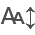

In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import numpy as np
from itables import show
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

In [173]:
pd.set_option('display.max_columns' , None)
data = pd.read_csv("/Users/sanjayakunwar/Desktop/telco.csv")
data.head()

Customer ID  Gender  Age Under 30 Senior Citizen Married Dependents  \
0  8779-QRDMV    Male   78       No            Yes      No         No   
1  7495-OOKFY  Female   74       No            Yes     Yes        Yes   
2  1658-BYGOY    Male   71       No            Yes      No        Yes   
3  4598-XLKNJ  Female   78       No            Yes     Yes        Yes   
4  4846-WHAFZ  Female   80       No            Yes     Yes        Yes   

   Number of Dependents        Country       State         City  Zip Code  \
0                     0  United States  California  Los Angeles     90022   
1                     1  United States  California  Los Angeles     90063   
2                     3  United States  California  Los Angeles     90065   
3                     1  United States  California    Inglewood     90303   
4                     1  United States  California     Whittier     90602   

    Latitude   Longitude  Population Quarter Referred a Friend  \
0  34.023810 -118.156582       68701      Q3                No   
1  34.044271 -118.185237       55668      Q3               Yes   
2  34.108833 -118.229715       47534      Q3                No   
3  33.936291 -118.332639       27778      Q3               Yes   
4  33.972119 -118.020188       26265      Q3               Yes   

   Number of Referrals  Tenure in Months    Offer Phone Service  \
0                    0                 1      NaN            No   
1                    1                 8  Offer E           Yes   
2                    0                18  Offer D           Yes   
3                    1                25  Offer C           Yes   
4                    1                37  Offer C           Yes   

   Avg Monthly Long Distance Charges Multiple Lines Internet Service  \
0                               0.00             No              Yes   
1                              48.85            Yes              Yes   
2                              11.33            Yes              Yes   
3                              19.76             No              Yes   
4                               6.33            Yes              Yes   

  Internet Type  Avg Monthly GB Download Online Security Online Backup  \
0           DSL                        8              No            No   
1   Fiber Optic                       17              No           Yes   
2   Fiber Optic                       52              No            No   
3   Fiber Optic                       12              No           Yes   
4   Fiber Optic                       14              No            No   

  Device Protection Plan Premium Tech Support Streaming TV Streaming Movies  \
0                    Yes                   No           No              Yes   
1                     No                   No           No               No   
2                     No                   No          Yes              Yes   
3                    Yes                   No          Yes              Yes   
4                     No                   No           No               No   

  Streaming Music Unlimited Data        Contract Paperless Billing  \
0              No             No  Month-to-Month               Yes   
1              No            Yes  Month-to-Month               Yes   
2             Yes            Yes  Month-to-Month               Yes   
3              No            Yes  Month-to-Month               Yes   
4              No            Yes  Month-to-Month               Yes   

    Payment Method  Monthly Charge  Total Charges  Total Refunds  \
0  Bank Withdrawal           39.65          39.65           0.00   
1      Credit Card           80.65         633.30           0.00   
2  Bank Withdrawal           95.45        1752.55          45.61   
3  Bank Withdrawal           98.50        2514.50          13.43   
4  Bank Withdrawal           76.50        2868.15           0.00   

   Total Extra Data Charges  Total Long Distance Charges  Total Revenue  \
0                        20               

In [174]:
df = data.copy()

In [175]:
columns = [{"orderable": True} for _ in df.columns]

show(df, lengthMenu=[3, 10, 25], search=True , columns=columns, layout= {"top1":"searchBuilder"})

### Categorized Age category and make a new column 'Age Distribution' 

In [176]:
def age_category(age):
    if age < 30:
        return 'Under 30'
    elif age < 64 :
        return 'Working Manpower'
    else:
        return 'Senior Citizen'

In [177]:
df['Age Distribution'] = df['Age'].apply(age_category)

####

#### Drop Country column since it has the same value for all entries (i.e., 'United States'). Similarly, drop the States column as all values are 'California'.
#### The Quarter column contains data only for 'Q3', so we can drop it.
#### Since we have the 'Age Distribution' column, we can also remove the 'Under 30', 'Senior Citizen', and 'Age' columns.


In [178]:
df.drop(columns=['Under 30' , 'Age' , 'Senior Citizen', 'State', 'Country', 'Quarter'], inplace=True)

In [179]:
bins = [0, 12, 24, 36, 48, 60, 72]
labels = [1, 2, 3, 4, 5, 6]

df['Tenure in Years']= pd.cut(df['Tenure in Months'] , bins=bins , labels=labels, right=True).astype('int')

###

####

In [180]:
column_to_convert = df.columns[df.isin(['Yes', 'No']).any()]
df[column_to_convert]= df[column_to_convert].replace({'Yes':True , 'No': False})

/var/folders/bw/9p5t8yvx4yd3f_hk8rmt94jr0000gn/T/ipykernel_43824/576613052.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



### Check Duplicates

In [181]:
df_duplicates=df[df.duplicated(df)]


####

###

### Age Distribution 

Text(0.5, 1.0, 'Average Revenue by each Age Distribution')

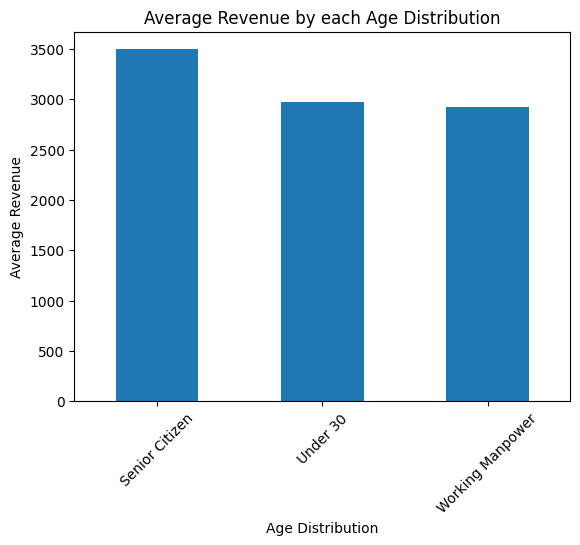

In [182]:
df.groupby('Age Distribution')['Total Revenue'].mean().plot(kind='bar')
plt.ylabel("Average Revenue")
plt.xticks(rotation=45)
plt.title("Average Revenue by each Age Distribution")

#### Most of the revenue was generated from  Senior Citizens.

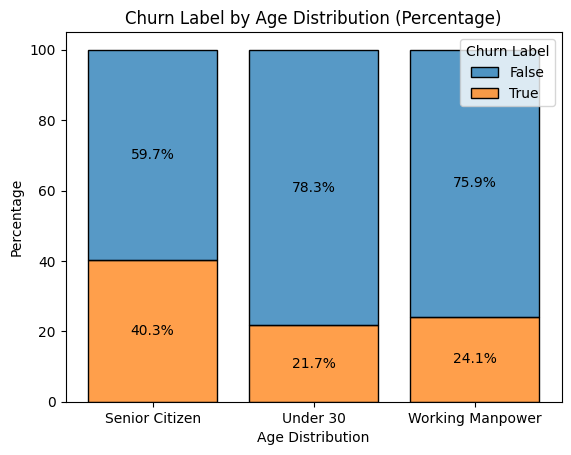

In [183]:
#  Count Churn label for different Age distribution

count_churn = df.groupby(['Age Distribution' , 'Churn Label']).size()

count_churn = df.groupby(['Age Distribution' , 'Churn Label']).size().reset_index(name='Count')


# Count total for each Age Distribution

total_counts = count_churn.groupby('Age Distribution')['Count'].transform('sum')
count_churn['Percentage']= (count_churn['Count']/ total_counts) * 100


ax = sns.histplot(data = count_churn, x='Age Distribution' ,hue='Churn Label' , weights='Percentage',  multiple='stack', shrink=0.8)

for p in ax.patches:
    height = p.get_height()
    x= p.get_x()
    width = p.get_width()
    y = p.get_y()


    
    ax.annotate(f'{height:.1f}%', 
                (x + width / 2, y + height / 2), 
                ha='center', va='center', 
                xytext=(0, 0), 
                textcoords='offset points'
               )

plt.title('Churn Label by Age Distribution (Percentage)')
plt.xlabel('Age Distribution')
plt.ylabel('Percentage')


plt.show()

#### Senior Citizens are the most likely to churn.

####

In [184]:
df[(df['Age Distribution'] == 'Senior Citizen')].groupby('Churn Category')['Churn Reason'].value_counts().sort_values(ascending=False)

Churn Category   Churn Reason                             
Competitor       Competitor made better offer                 96
                 Competitor had better devices                92
Attitude         Attitude of support person                   66
Price            Price too high                               28
Competitor       Competitor offered more data                 28
Attitude         Attitude of service provider                 28
Other            Don't know                                   28
Dissatisfaction  Product dissatisfaction                      23
                 Network reliability                          19
                 Limited range of services                    16
                 Service dissatisfaction                      15
Competitor       Competitor offered higher download speeds    13
Price            Long distance charges                        13
                 Extra data charges                           13
                 Lack of affordable download/upload speed      8
Other            Moved                                         8
                 Poor expertise of online support              7
Dissatisfaction  Poor expertise of online support              3
Other            Deceased                                      2
Dissatisfaction  Poor expertise of phone support               1
                 Lack of self-service on Website               1
Name: count, dtype: int64

#### The main reason Senior Citizens migrated to a competitor is due to the offers and devices provided by the competitor. Price comes in only the fourth position, after the attitude of the support person.

####

####

## Number of Dependents Distribution

#### Average revenue by Number of Depedence

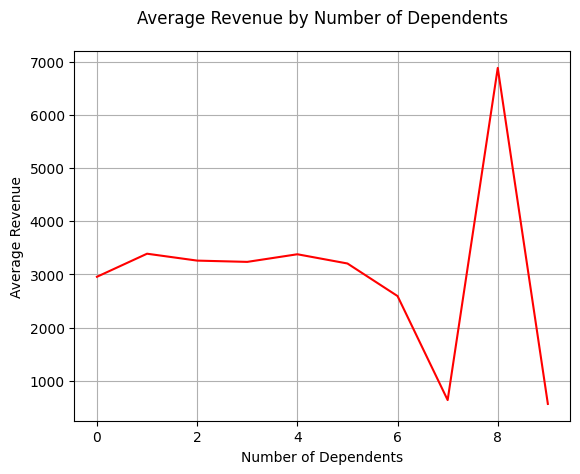

In [185]:
df.groupby('Number of Dependents')['Total Revenue'].mean().plot(kind='line', color='r')
plt.title('Average Revenue by Number of Dependents', pad=20)
plt.xlabel('Number of Dependents')
plt.ylabel('Average Revenue')
plt.grid(True)

In [186]:
df[df['Churn Label'] == True].groupby('Number of Dependents').size().reset_index(name='count')

Number of Dependents  count
0                     0   1763
1                     1     38
2                     2     33
3                     3     30
4                     4      1
5                     5      2
6                     6      1
7                     7      1

#### Customers with 'Number of Dependents' equal to 0 have the highest churn rate, outnumbering all other groups combined.

Text(0, 0.5, 'Churn Reason')

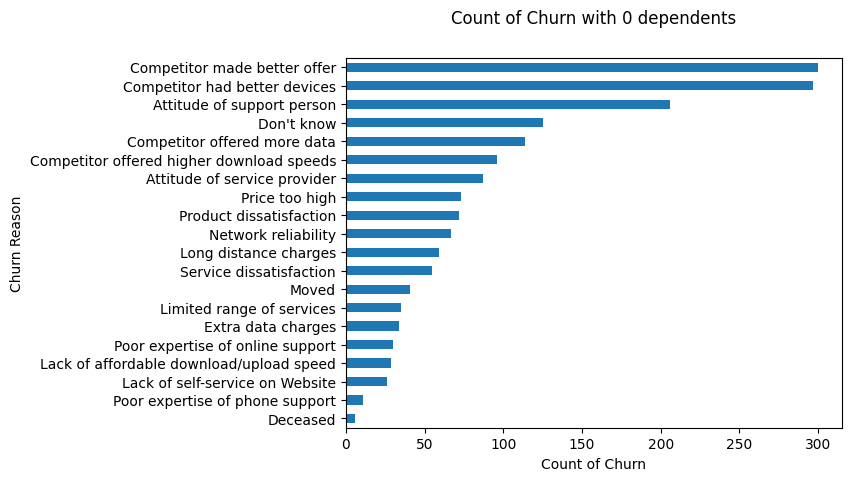

In [187]:
df[df['Number of Dependents'] == 0 ].groupby('Churn Reason').size().sort_values(ascending=True).plot(kind='barh' )
plt.title('Count of Churn with 0 dependents', pad=25)
plt.xlabel('Count of Churn')
plt.ylabel('Churn Reason')


#### One of the most important reasons why people churn is due to competitors and the attitude of support personnel from the company.

####

####

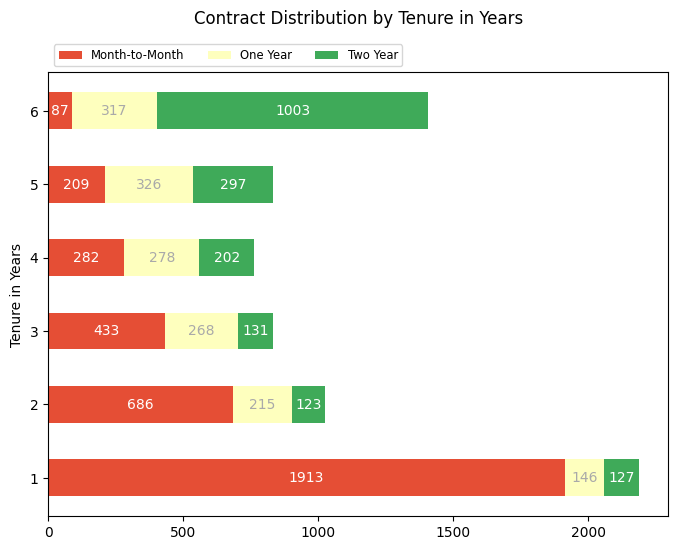

In [188]:

grouped_count = df.groupby('Tenure in Years')['Contract'].value_counts().unstack(fill_value=0)

labels = list(grouped_count.index)
data2 = grouped_count.values
data2_cum = data2.cumsum(axis=1)
category_names = grouped_count.columns.tolist()

category_colors = plt.cm.RdYlGn(np.linspace(0.15, 0.85, data2.shape[1]))

fig, ax = plt.subplots( figsize=(8, 6))

for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    widths = data2[:, i]
    starts = data2_cum[:, i] - widths
    rects = ax.barh(labels, widths, left=starts, height=0.5, label=colname, color=color)
    r, g, b, _ = color
    text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    ax.bar_label(rects, label_type='center', color=text_color)

ax.legend(ncols=len(category_names), bbox_to_anchor=(0, 1), loc='lower left', fontsize='small')
plt.title('Contract Distribution by Tenure in Years', loc='center', pad=35)
plt.subplots_adjust(top=0.85)

plt.ylabel('Tenure in Years')
plt.show()


####

####

####

In [189]:
internet_group = df.groupby('Churn Label')['Internet Type'].value_counts().unstack()
internet_group

Internet Type  Cable   DSL  Fiber Optic
Churn Label                            
False            617  1345         1799
True             213   307         1236

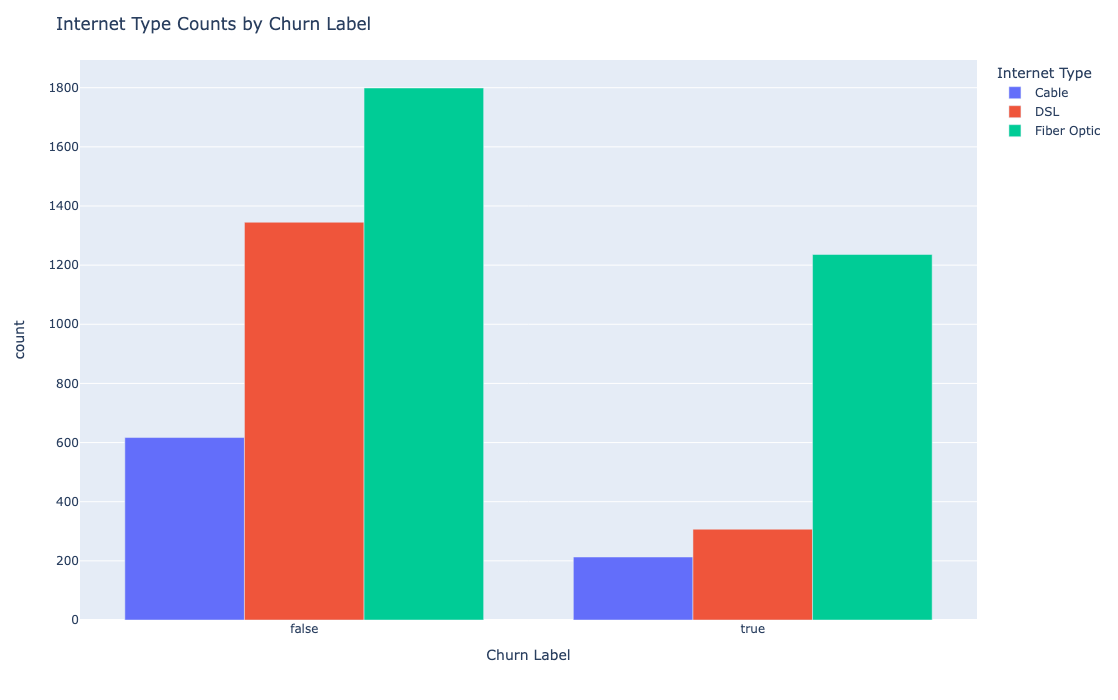

In [190]:
fig = px.bar(internet_group, barmode='group', height=700, width=1000)
fig.update_layout(title= 'Internet Type Counts by Churn Label',
                  xaxis_title= 'Churn Label',
                  yaxis_title = 'count'
                 )

####

####

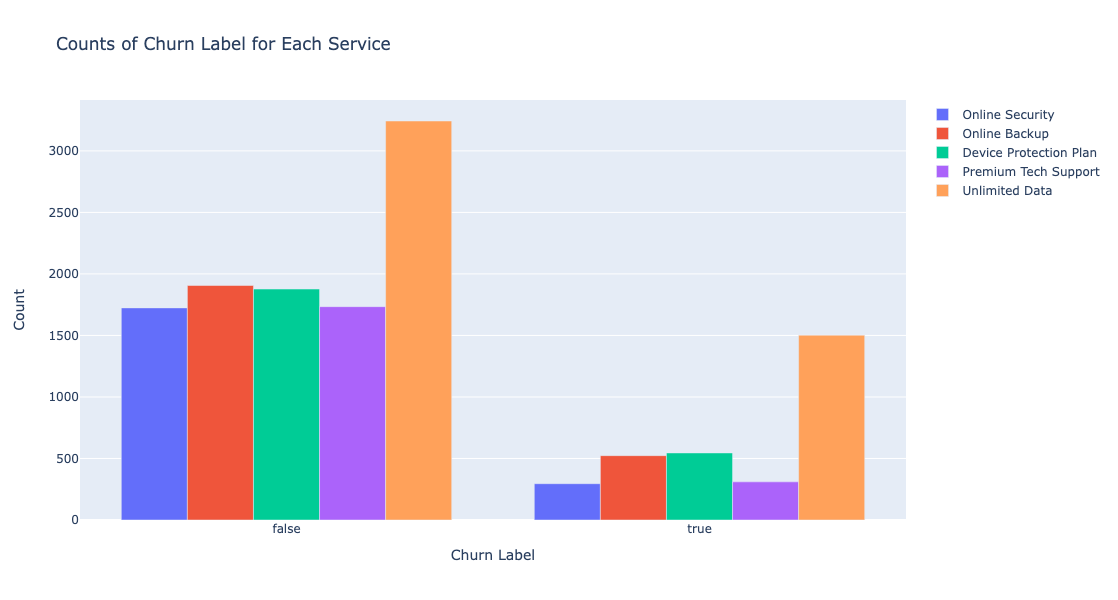

In [191]:
import plotly.graph_objs as go

def count_occurrences_by_service(df, services):
    """
    Count occurrences of each 'Churn Label' for each service.
    
    Args:
    - df: DataFrame containing the data
    - services: List of service columns to count occurrences for
    
    Returns:
    - counts_by_service: Dictionary containing counts for each service
    """
    # Initialize a dictionary to store the counts for each service
    counts_by_service = {}

    # Iterate over each service column
    for service in services:
        # Filter the DataFrame to include only rows where the current service is True
        service_true_df = df[df[service] == True]
        
        # Group the filtered DataFrame by 'Churn Label' and count occurrences
        counts_by_churn_label = service_true_df.groupby('Churn Label').size()
        
        # Store the counts in the dictionary
        counts_by_service[service] = counts_by_churn_label

    return counts_by_service

# Define the services
services = ['Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Unlimited Data']

# Count occurrences for each service
counts_by_service = count_occurrences_by_service(df, services)

# Create traces for each 'Churn Label'
traces = []
for churn_label, counts in counts_by_service.items():
    trace = go.Bar(
        x=list(counts.index),
        y=counts.values,
        name=churn_label
    )
    traces.append(trace)

# Create layout
layout = go.Layout(
    title='Counts of Churn Label for Each Service',
    xaxis=dict(title='Churn Label'),
    yaxis=dict(title='Count')
, width=1000, height=600)

# Create figure
fig = go.Figure(data=traces, layout=layout)

# Display the plot
fig.show()


####

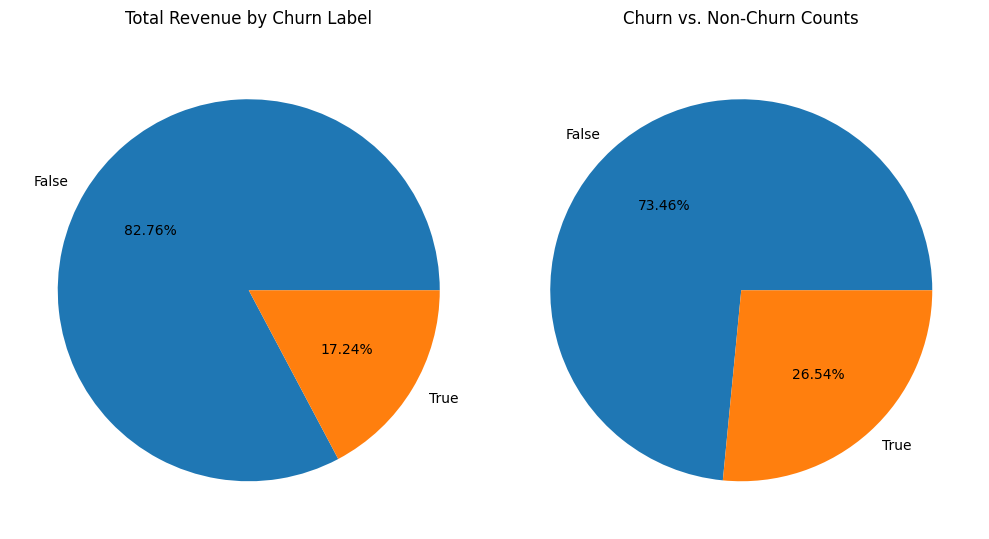

In [192]:
fig, ax = plt.subplots(1, 2, figsize=(10,10))
df.groupby('Churn Label')['Total Revenue'].sum().plot(kind='pie', autopct='%1.2f%%', ax=ax[0])
ax[0].set_title('Total Revenue by Churn Label', pad = 20)
ax[0].set_ylabel('')

df.groupby('Churn Label').size().plot(kind='pie', autopct='%1.2f%%', ax=ax[1])
ax[1].set_title('Churn vs. Non-Churn Counts', pad = 20)

plt.tight_layout()
plt.show()

### Churn customers generated 17.24% of the total revenue, which is equivalent to 20.83% of the revenue generated by non-churn customers.
### 26.54% of customers churned, which constitutes a significant portion of the total customer base . 

####

### Churn Reasons by Categories

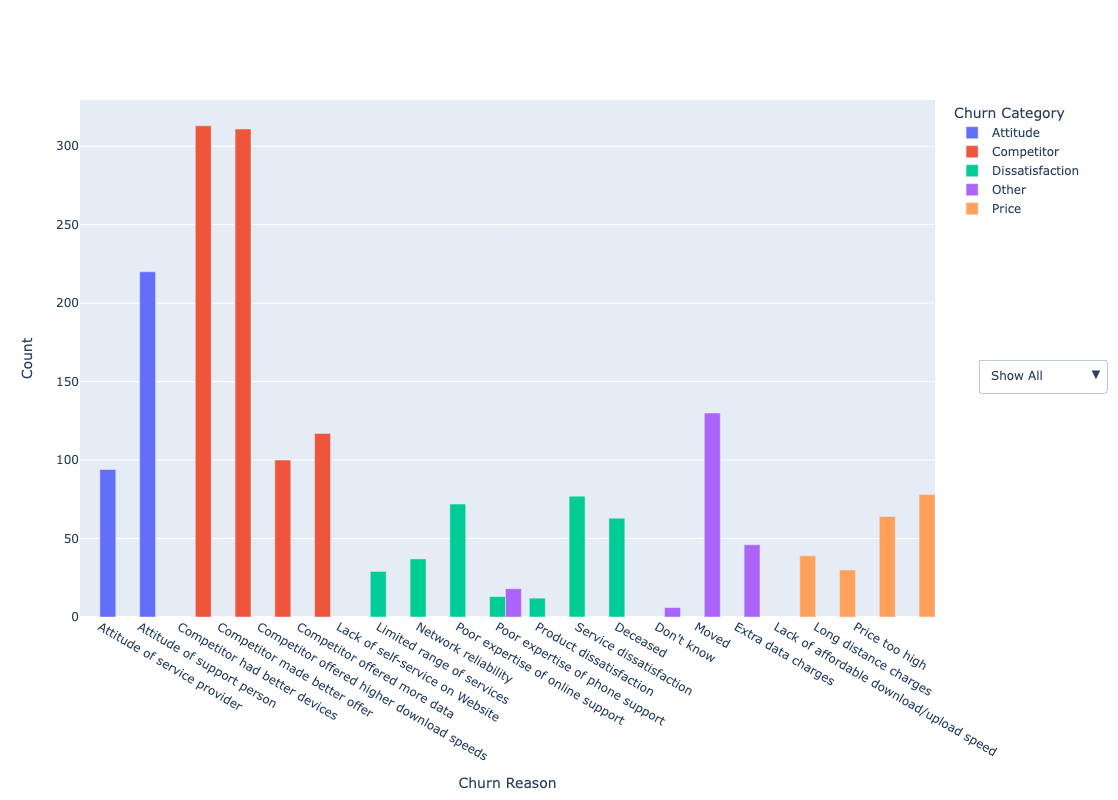

In [193]:
import plotly.graph_objects as go

# Filter data for churn label True
filtered = df[df['Churn Label'] == True]

# Group by Churn Category and Churn Reason, then calculate counts
filtered_df = filtered.groupby(['Churn Category', 'Churn Reason']).size().reset_index(name='count')

# Group by Churn Category and sum the counts
churn_category_totals = filtered_df.groupby('Churn Category')['count'].sum()

# Get unique churn categories and churn reasons
churn_categories = filtered_df['Churn Category'].unique()
churn_reasons = filtered_df['Churn Reason'].unique()

traces = []

# Set the bar width
bar_width = 0.4

# Iterate over churn categories
for idx, category in enumerate(churn_categories):
    category_data = filtered_df[filtered_df['Churn Category'] == category]
    # Add an offset to the x-coordinate of each bar within the same category
    x_values = [reason for reason in category_data['Churn Reason']]
    offset = idx * bar_width
    traces.append(
        go.Bar(
            x=x_values,
            y=category_data['count'],
            name=category,  # Use Churn Category for legend
            width=bar_width,
            offset=offset,  # Set offset for bars within the same category
            customdata=category_data['count'],  # Store counts as custom data for hover
            hovertemplate="Churn Reason: %{x}<br>Count: %{customdata}",
            visible=True  # Set initial visibility to True
        )
    )

# Create the figure
fig = go.Figure(data=traces)

# Update layout
fig.update_layout(
    xaxis_title='Churn Reason',
    yaxis_title='Count',
    legend_title='Churn Category',
    width=1100,
    height=800
)

# Add toggle buttons for legend items
buttons = []
for category in churn_categories:
    button = dict(
        label=category,
        method='update',
        args=[{'visible': [category in trace.name for trace in fig.data]}]  # Show only traces with selected category
    )
    buttons.append(button)

# Add button to show all categories
buttons.insert(0, dict(label='Show All', method='update', args=[{'visible': [True] * len(fig.data)}]))

fig.update_layout(
    updatemenus=[
        dict(
            buttons=buttons,
            direction='down',
            showactive=True,
            x=1.05,
            xanchor='left',
            y=0.5,
            yanchor='top'
        )
    ]
)

# Show the plot
fig.show()

####

####

Text(0, 0.5, 'Frequency')

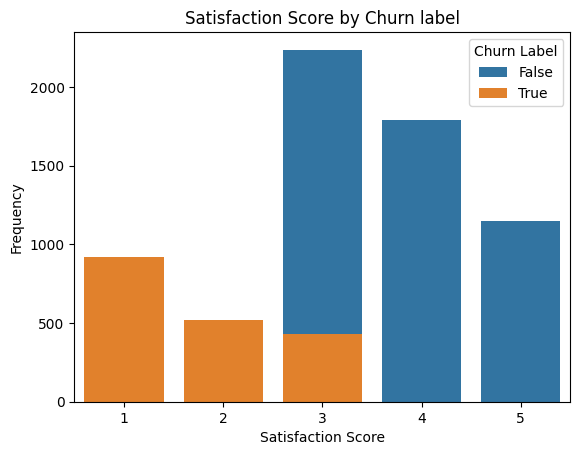

In [194]:
sns.countplot(data=df, x='Satisfaction Score', hue='Churn Label', dodge=False)
plt.title('Satisfaction Score by Churn label')
plt.xlabel('Satisfaction Score')
plt.ylabel('Frequency')

### We can see that all clients who gave a '1' or '2' rating have churned in Q3.

In [195]:
 df[(df['Satisfaction Score'].isin([1, 2])) & (df['Churn Label'] == True) & (df['Churn Reason'] != 'Don\'t know')].groupby('Churn Reason').size().sort_values(ascending=False).reset_index(name='count').head(5)


Churn Reason  count
0              Competitor had better devices    313
1               Competitor made better offer    224
2                 Attitude of support person    150
3               Competitor offered more data     81
4  Competitor offered higher download speeds     79

### Top reasons for churn are 
- Competitor had better devices
- Competitor made better offer
- Attitude of support person 

####

####

Text(0, 0.5, 'Total Revenue')

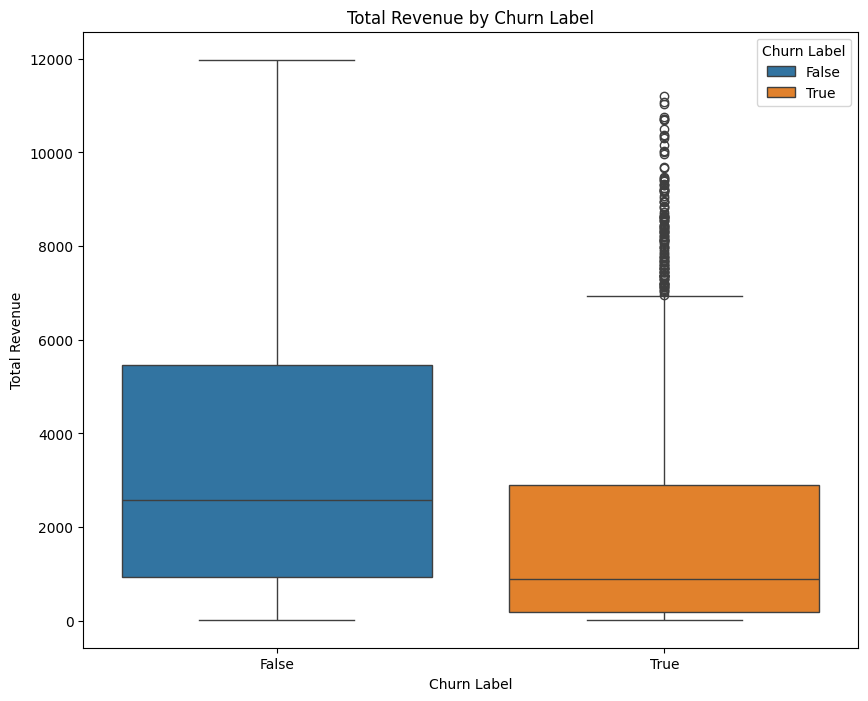

In [196]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x='Churn Label', y='Total Revenue', hue='Churn Label')
plt.title('Total Revenue by Churn Label')
plt.xlabel('Churn Label')
plt.ylabel('Total Revenue')

####

####

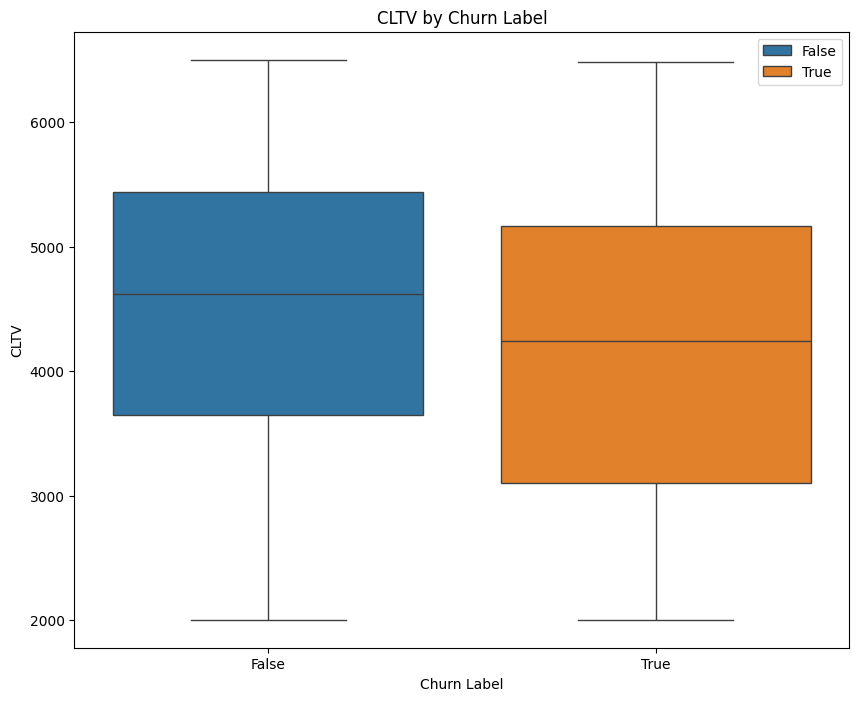

In [197]:
plt.figure(figsize=(10, 8))

sns.boxplot(data = df, x='Churn Label', y='CLTV' , hue='Churn Label')
plt.title('CLTV by Churn Label' )
plt.xlabel('Churn Label')
plt.ylabel('CLTV')
plt.legend(loc='upper right')

### Quick Recap
- The primary revenue source is senior citizens, who largely switch to competitors for better offers and devices, with support staff 
    attitudes ranking third in importance.
- Customers with no dependents exhibit the highest churn rate, surpassing all other groups combined. A significant factor contributing to 
   churn includes competition and the demeanor of company support staff.
- In the case of internet services, customers with fiber optic connections are more likely to churn.
- Among other services, 'Unlimited data' is the most likely to lead to churn, possibly because competitors are offering more data and 
  higher download speeds.
- All people who gave a rating of 1 or 2 have churned.
- The median total revenue contributed by customers who did not churn is equal to the value at which 75% of the total revenue among churned 
   customers falls below.
- In the end of Q3 , 26.54 % client churned , who contributed 17.24 % in total revenue.

### Top reasons for churn are 
- Competitor had better devices
- Competitor made better offer
- Attitude of support person 

####

####

In [198]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
import pandas as pd

# Assuming df contains your dataset
X = df.drop(columns=['Customer ID', 'Churn Label', 'Churn Reason', 'Churn Category'])
y = df['Churn Label']

# Identifying categorical and numerical columns
cat_columns = X.select_dtypes(include=['bool', 'object']).columns.tolist()
num_columns = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocessing pipeline for categorical and numerical columns separately
cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessing = ColumnTransformer(
    transformers=[
        ('cat', cat_transformer, cat_columns),
        ('num', num_transformer, num_columns)
    ]
)

# Model definitions
models = {
    'RandomForestClassifier': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}

# Fitting the models and evaluating performance with cross-validation
for name, model in models.items():
    clf = Pipeline(steps=[
        ('preprocessor', preprocessing),
        ('classifier', model)
    ])
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')  # Change cv value as needed
    print(f'{name} - Average Accuracy: {scores.mean()}, Average Precision: {scores.std()}')


RandomForestClassifier - Average Accuracy: 0.9991477272727274, Average Precision: 0.0011363636363636298
XGBoost - Average Accuracy: 1.0, Average Precision: 0.0
